In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Факултет/Podatocno Rudarenje/current-employee-names-salaries-and-position-titles-1.csv')

In [6]:
data.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,$101442.00,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,$94122.00,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,$101592.00,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,$110064.00,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,$19.86


In [7]:
data.drop('Name', axis=1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Titles         33183 non-null  object 
 1   Department         33183 non-null  object 
 2   Full or Part-Time  33183 non-null  object 
 3   Salary or Hourly   33183 non-null  object 
 4   Typical Hours      8022 non-null   float64
 5   Annual Salary      25161 non-null  object 
 6   Hourly Rate        8022 non-null   object 
dtypes: float64(1), object(6)
memory usage: 1.8+ MB


In [9]:
data.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Job Titles         33183 non-null  bool 
 1   Department         33183 non-null  bool 
 2   Full or Part-Time  33183 non-null  bool 
 3   Salary or Hourly   33183 non-null  bool 
 4   Typical Hours      33183 non-null  bool 
 5   Annual Salary      33183 non-null  bool 
 6   Hourly Rate        33183 non-null  bool 
dtypes: bool(7)
memory usage: 227.0 KB


<Axes: >

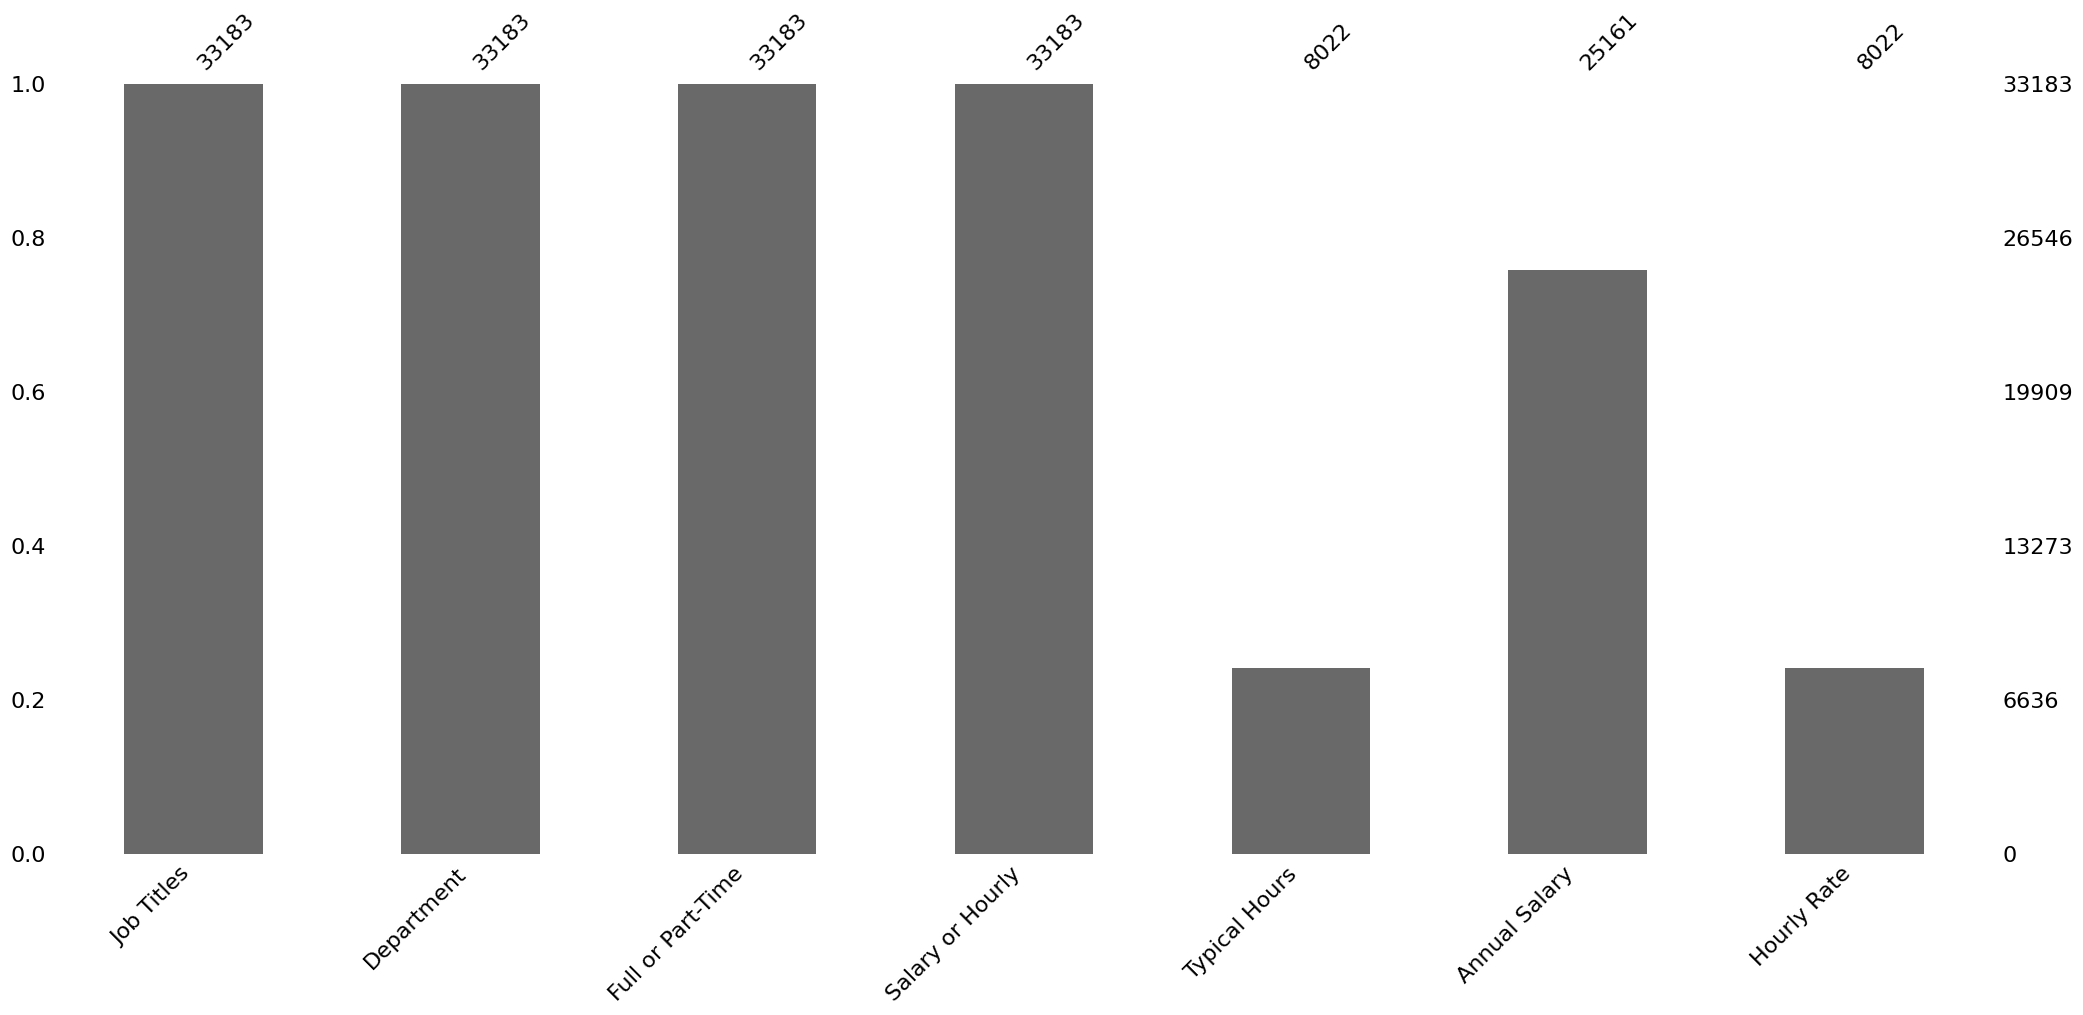

In [10]:
import missingno as msno
msno.bar(data)

Податоците што недостасуваат може да бидат од тип MAR, т.е. можеби испитаниците не сакале да кажат точно колку саати работат и колку е нивната вистинска плата.

In [11]:
data['Annual Salary'] = data['Annual Salary'].str.replace('$','').astype(float)
data['Hourly Rate'] = data['Hourly Rate'].str.replace('$','').astype(float)

<ipython-input-11-d74c364048b9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Annual Salary'] = data['Annual Salary'].str.replace('$','').astype(float)
<ipython-input-11-d74c364048b9>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Hourly Rate'] = data['Hourly Rate'].str.replace('$','').astype(float)


In [12]:
data.head()

,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [14]:
label_encoder.fit(data['Job Titles'])
data['Job Titles'] = label_encoder.transform(data['Job Titles'])

In [15]:
label_encoder.fit(data['Department'])
data['Department'] = label_encoder.transform(data['Department'])

In [16]:
label_encoder.fit(data['Full or Part-Time'])
data['Full or Part-Time'] = label_encoder.transform(data['Full or Part-Time'])

In [17]:
label_encoder.fit(data['Salary or Hourly'])
data['Salary or Hourly'] = label_encoder.transform(data['Salary or Hourly'])

In [18]:
data

,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,943,27,0,1,NaN,101442.0,NaN
1,792,27,0,1,NaN,94122.0,NaN
2,184,18,0,1,NaN,101592.0,NaN
3,229,34,0,1,NaN,110064.0,NaN
4,1070,26,1,0,20.0,NaN,19.86
...,...,...,...,...,...,...,...
33178,787,27,0,1,NaN,72510.0,NaN
33179,787,27,0,1,NaN,48078.0,NaN
33180,787,27,0,1,NaN,90024.0,NaN
33181,787,27,0,1,NaN,93354.0,NaN


In [19]:
from sklearn.impute import KNNImputer

In [20]:
imputer = KNNImputer(n_neighbors=5)

In [21]:
data['Typical Hours'] = imputer.fit_transform(data[['Typical Hours']])

In [23]:
data['Annual Salary'] = imputer.fit_transform(data[['Annual Salary']])

In [25]:
data['Hourly Rate'] = imputer.fit_transform(data[['Hourly Rate']])

In [27]:
data['Typical Hours'] = data['Typical Hours'].astype(int)
data['Annual Salary'] = data['Annual Salary'].astype(int)
data['Hourly Rate'] = data['Hourly Rate'].astype(int)

In [28]:
data

,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,943,27,0,1,34,101442,32
1,792,27,0,1,34,94122,32
2,184,18,0,1,34,101592,32
3,229,34,0,1,34,110064,32
4,1070,26,1,0,20,86786,19
...,...,...,...,...,...,...,...
33178,787,27,0,1,34,72510,32
33179,787,27,0,1,34,48078,32
33180,787,27,0,1,34,90024,32
33181,787,27,0,1,34,93354,32


In [29]:
import numpy as np

In [33]:
from scipy.stats import gmean

In [35]:
data_TypicalHours = data['Typical Hours']

In [36]:
mean = data_TypicalHours.mean()
median = data_TypicalHours.median()
standard_d = data_TypicalHours.std()
geo_mean = gmean(data_TypicalHours)

In [39]:
print(f"Here are some statistic eleemnts for 'Typical hours' column:")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {standard_d}")
print(f"Geometric Mean: {geo_mean}")

Here are some statistic eleemnts for 'Typical hours' column:
Mean: 34.12271343760359
Median: 34.0
Standard Deviation: 4.554045000424733
Geometric Mean: 33.711355273550346


In [40]:
import matplotlib.pyplot as plt

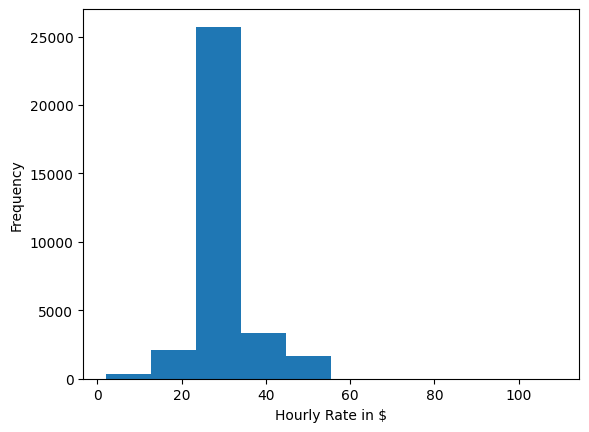

In [43]:
plt.hist(data['Hourly Rate'], bins=10)
plt.xlabel('Hourly Rate in $')
plt.ylabel('Frequency')
plt.show()

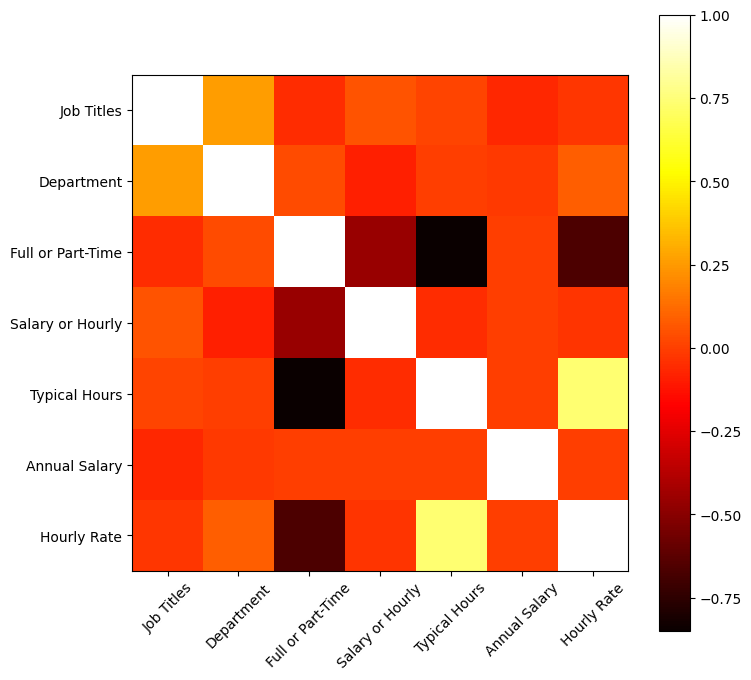

In [48]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(corr_matrix, cmap='hot', interpolation='nearest')
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45)
ax.set_yticklabels(corr_matrix.columns)
plt.colorbar(im)
plt.show()

In [49]:
import seaborn as sns

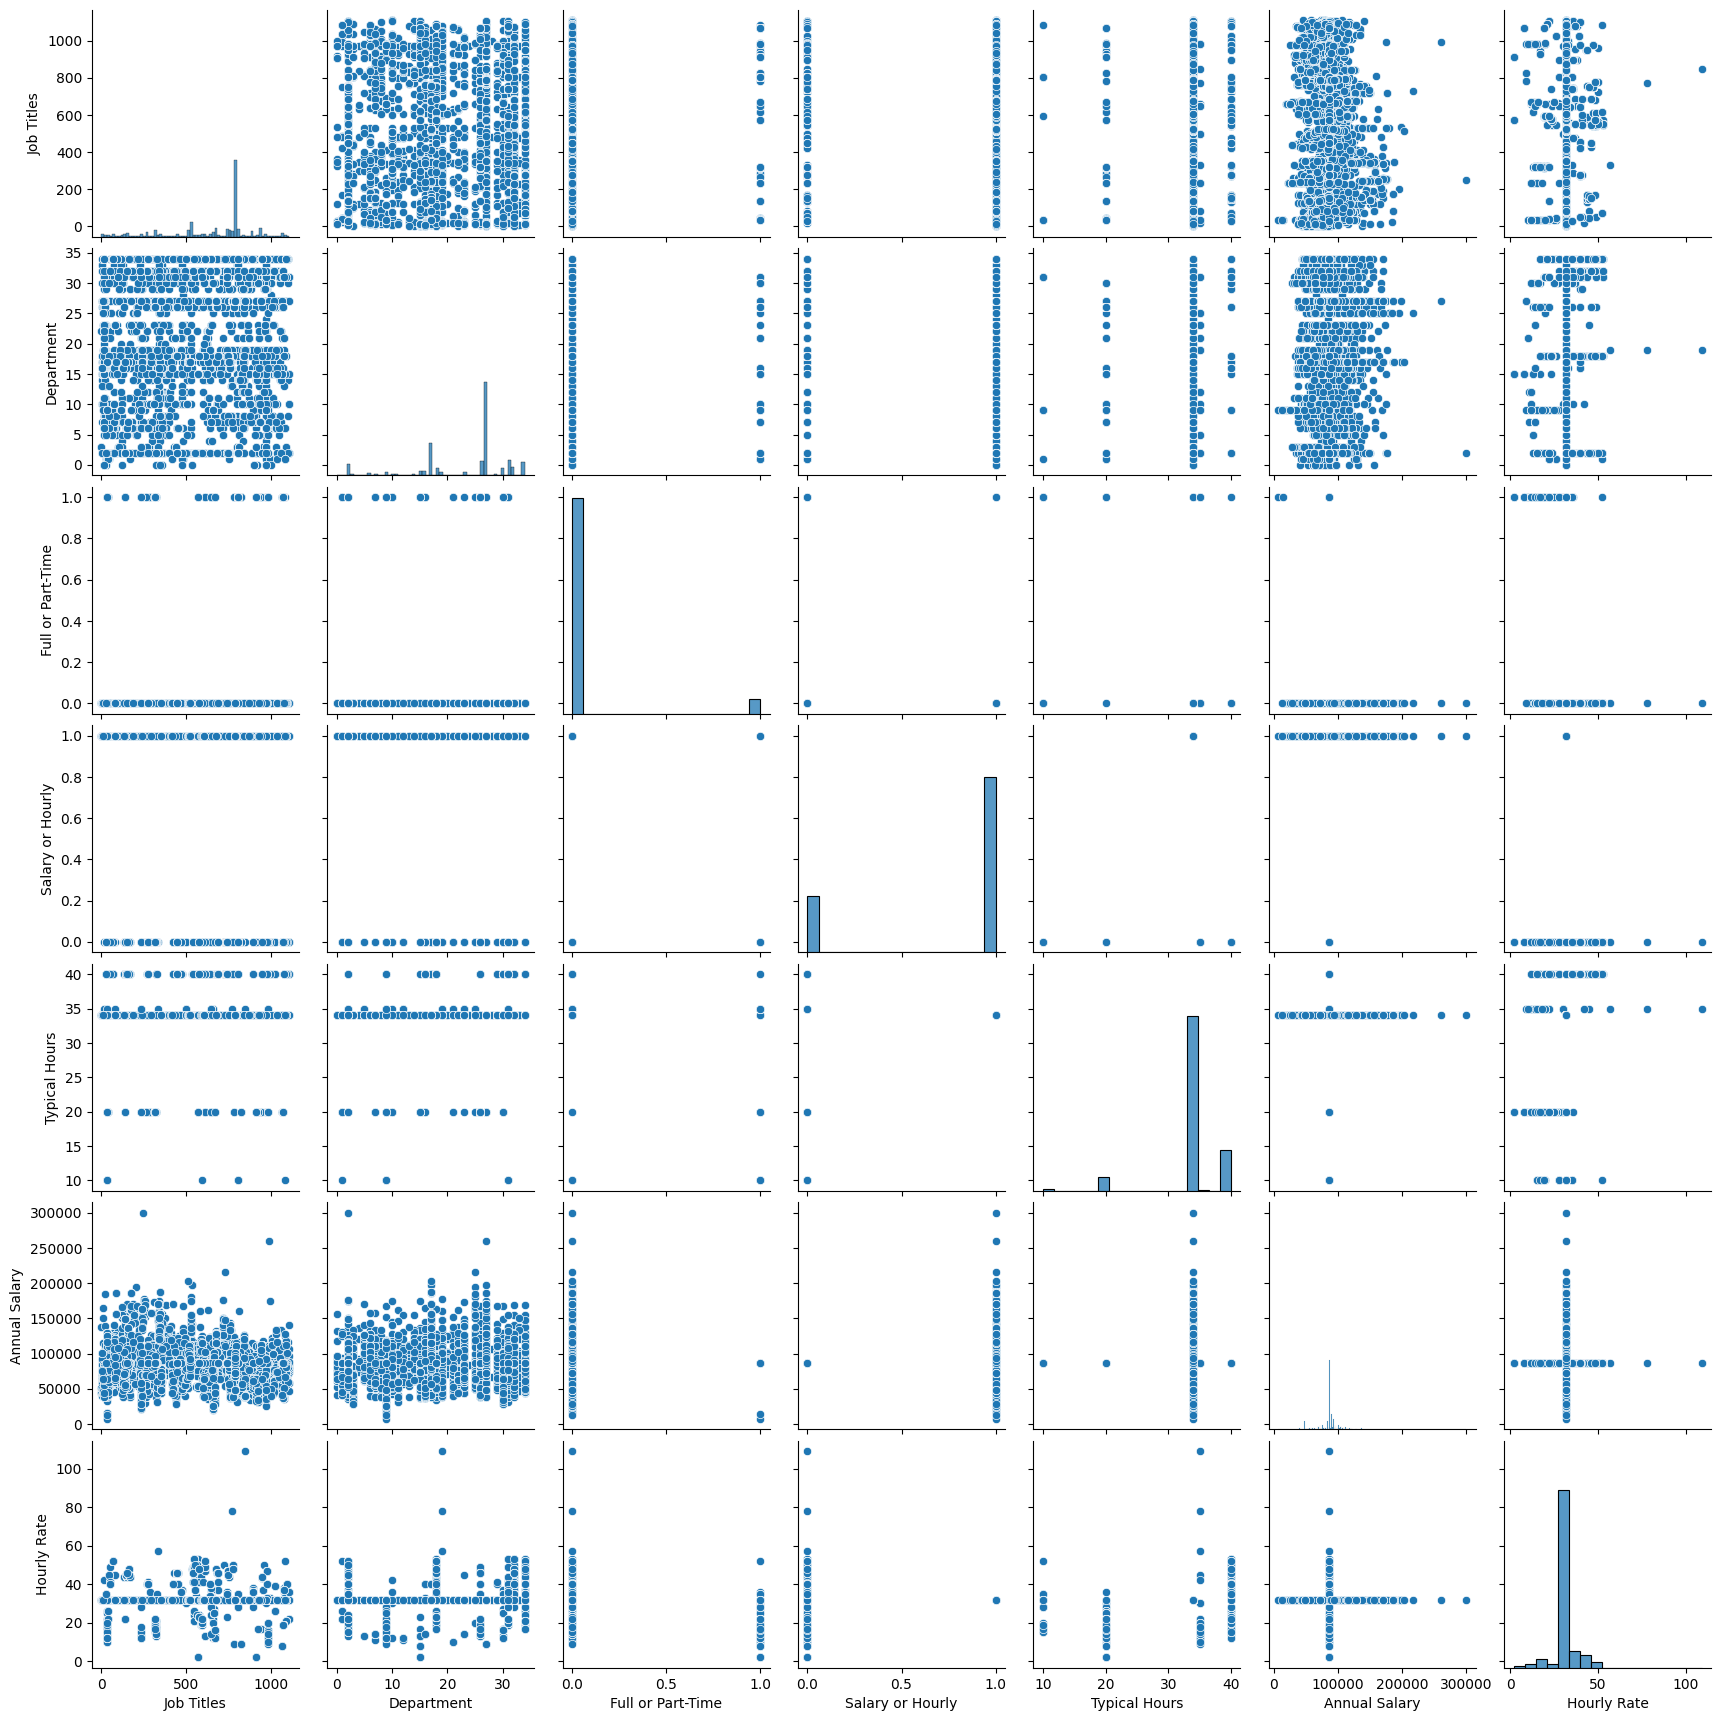

In [50]:
sns.pairplot(data)

<Axes: >

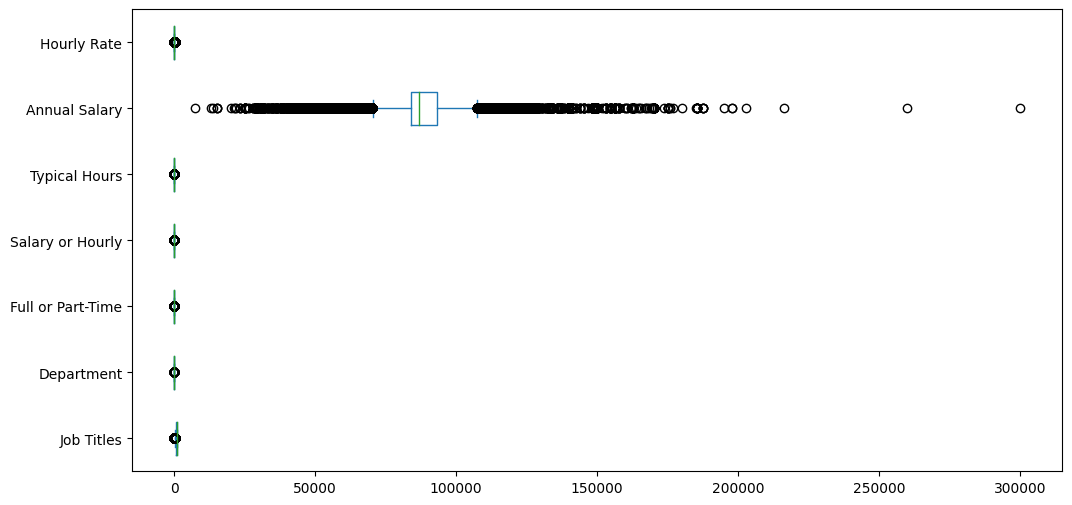

In [58]:
data.plot(kind='box', vert=False, figsize=(12, 6))